<a href="https://colab.research.google.com/github/angelamunozc/Talento-tech/blob/main/entrenamiento/Actividad_2_unidad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

step 0 / 400 loss= 0.4531224 Acc= 0.358
generando animación
step 25 / 400 loss= 0.27868664 Acc= 0.728
generando animación
step 50 / 400 loss= 0.23964186 Acc= 0.76
generando animación
step 75 / 400 loss= 0.20341882 Acc= 0.784
generando animación
step 100 / 400 loss= 0.14683315 Acc= 0.844
generando animación
step 125 / 400 loss= 0.036174674 Acc= 0.942
generando animación
step 150 / 400 loss= 0.011542142 Acc= 1.0
generando animación
step 175 / 400 loss= 0.0074614906 Acc= 1.0
generando animación
step 200 / 400 loss= 0.0057160817 Acc= 1.0
generando animación
step 225 / 400 loss= 0.004681735 Acc= 1.0
generando animación
step 250 / 400 loss= 0.0039761225 Acc= 1.0
generando animación
step 275 / 400 loss= 0.0034726418 Acc= 1.0
generando animación
step 300 / 400 loss= 0.0030839322 Acc= 1.0
generando animación
step 325 / 400 loss= 0.0027756435 Acc= 1.0
generando animación
step 350 / 400 loss= 0.0025223938 Acc= 1.0
generando animación
step 375 / 400 loss= 0.0023109796 Acc= 1.0
generando animación


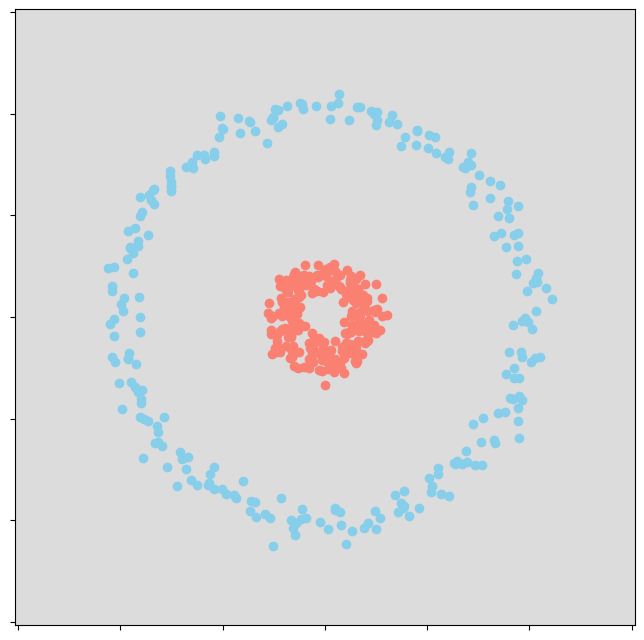

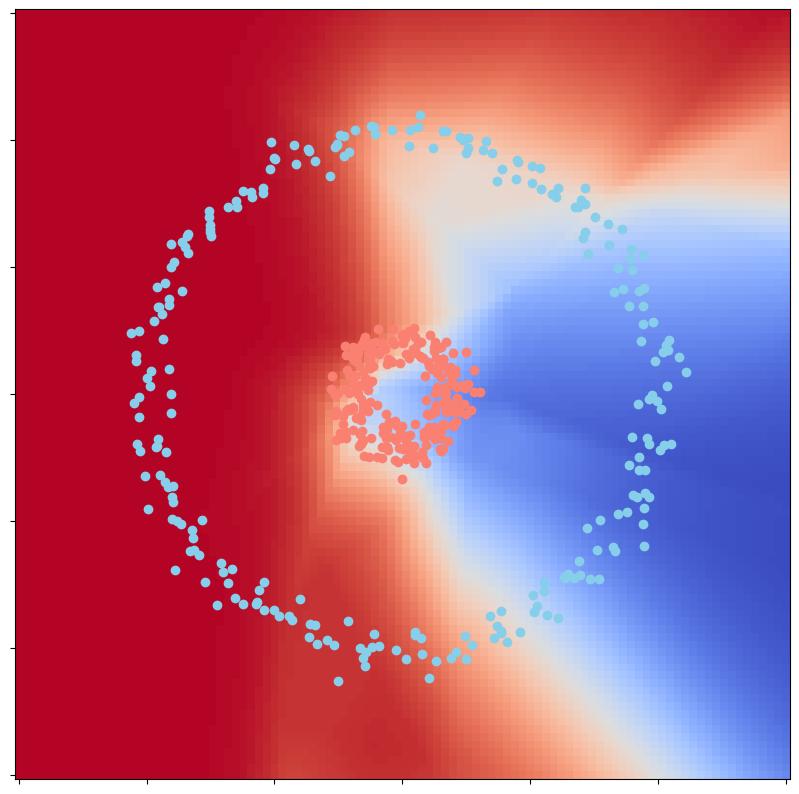

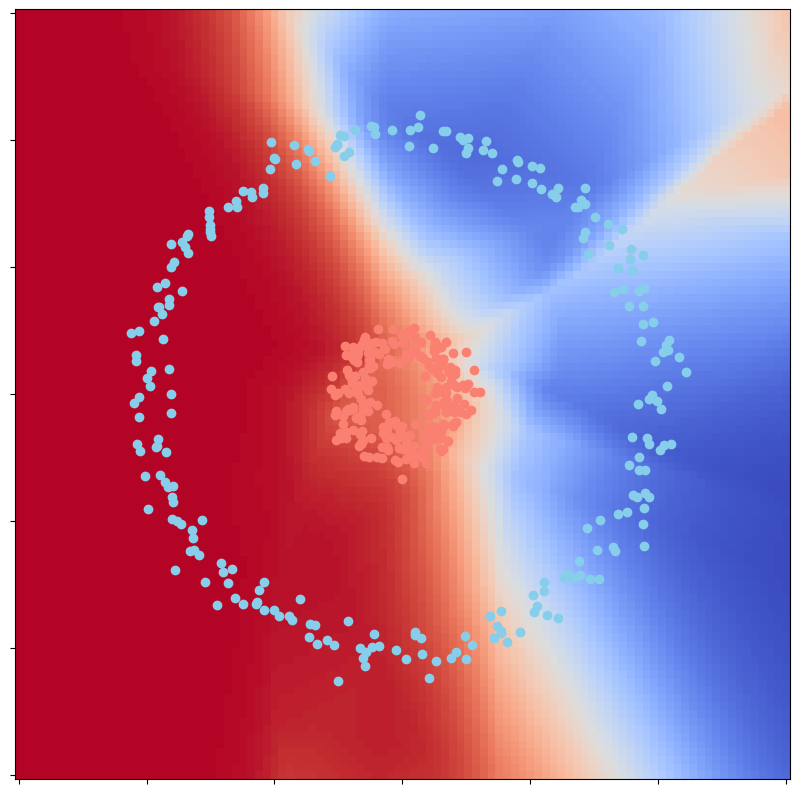

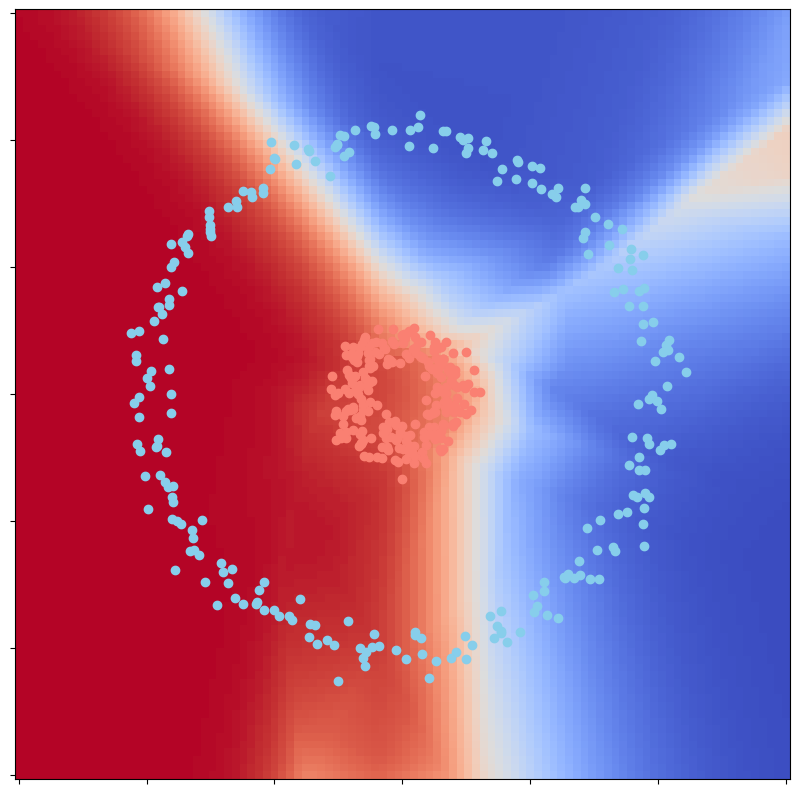

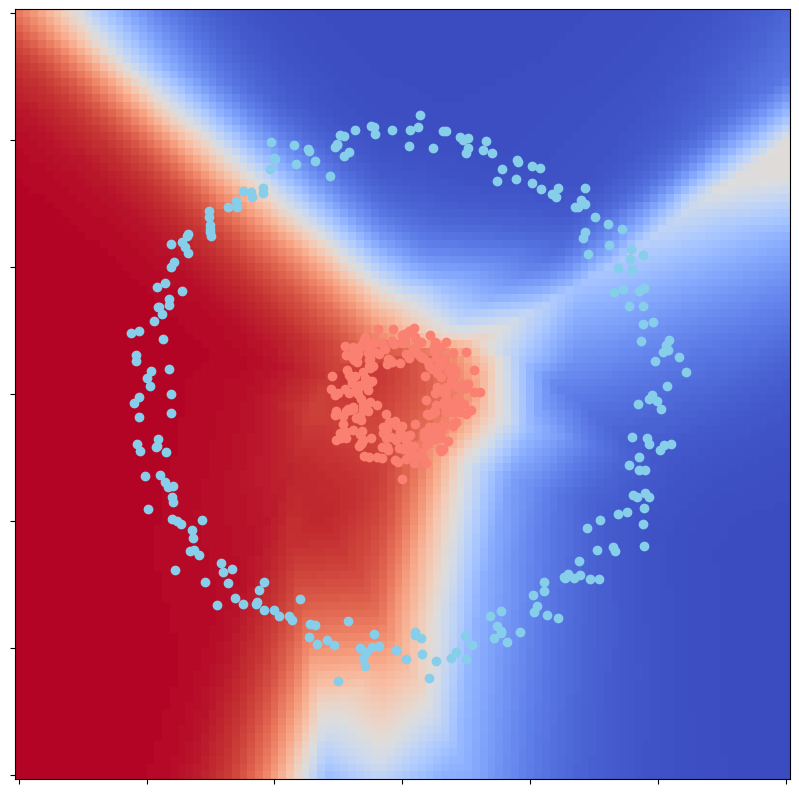

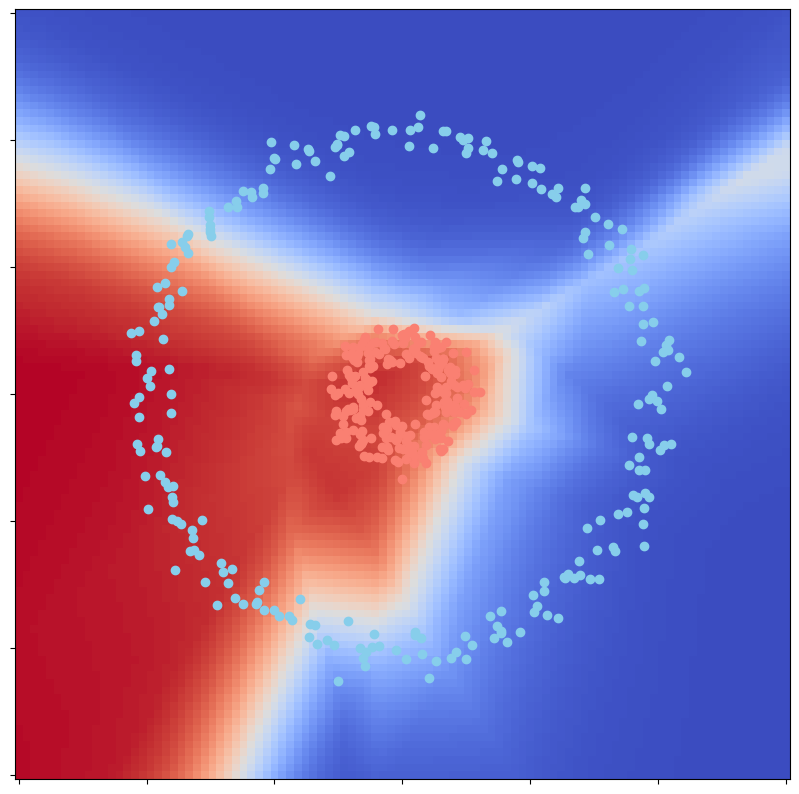

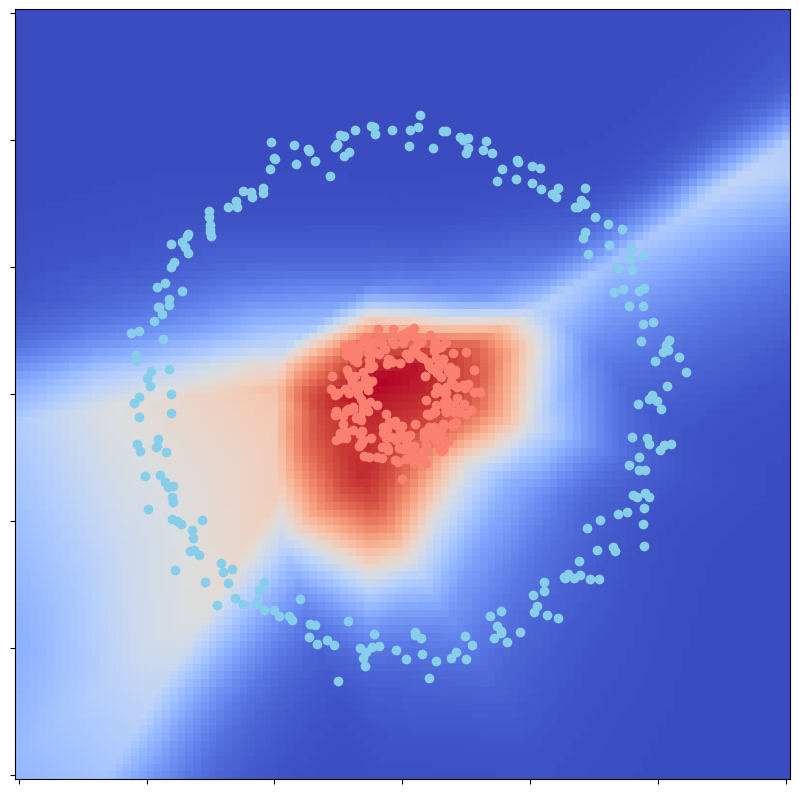

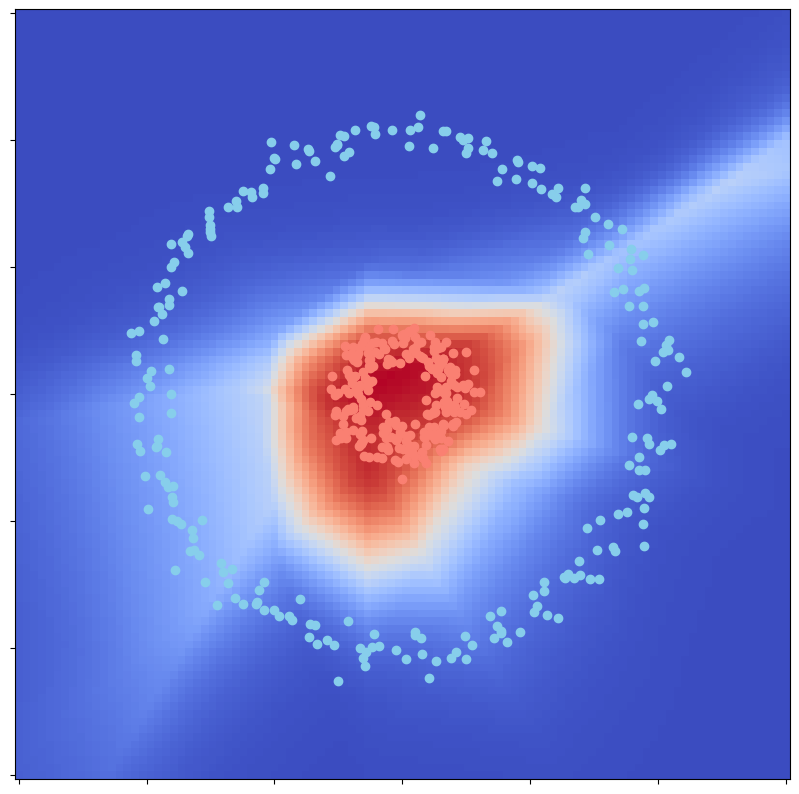

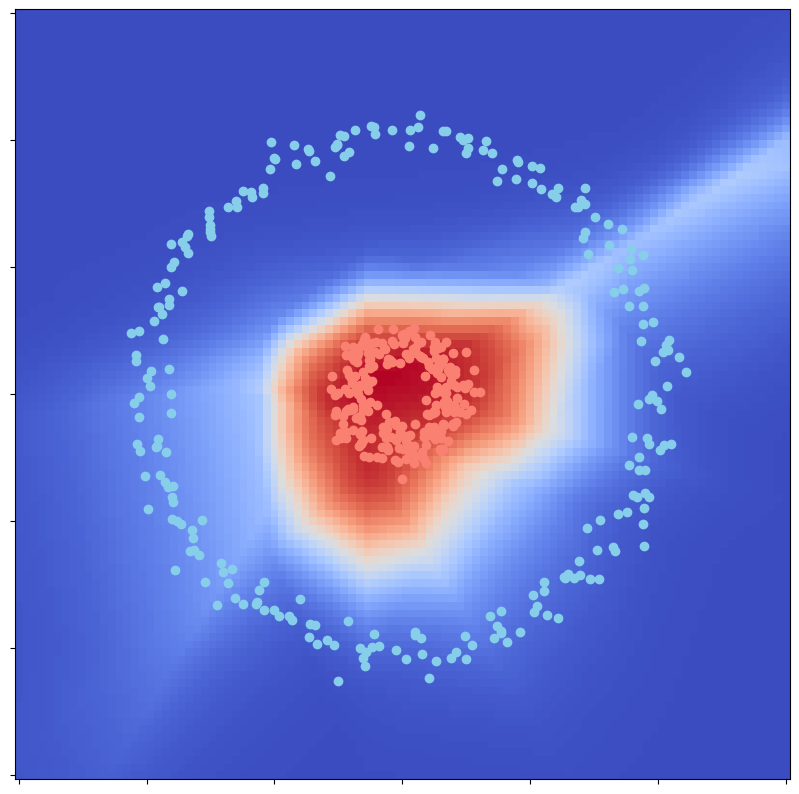

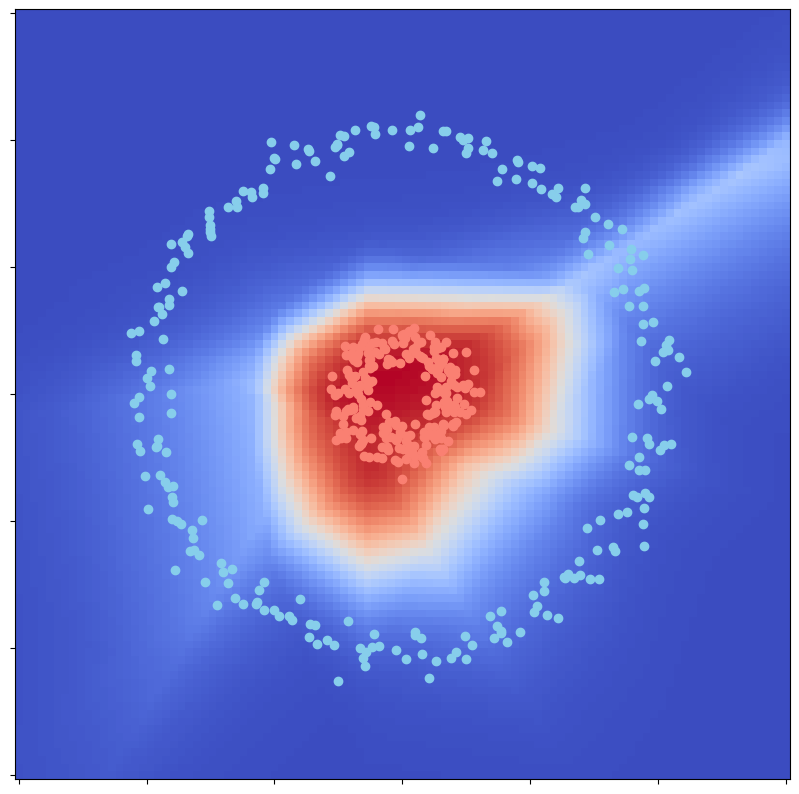

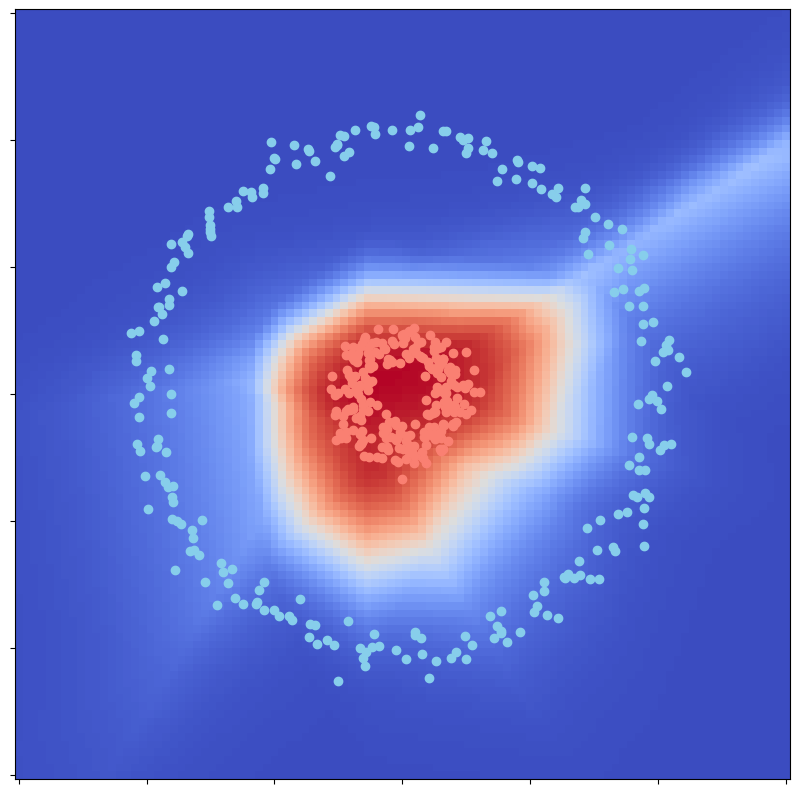

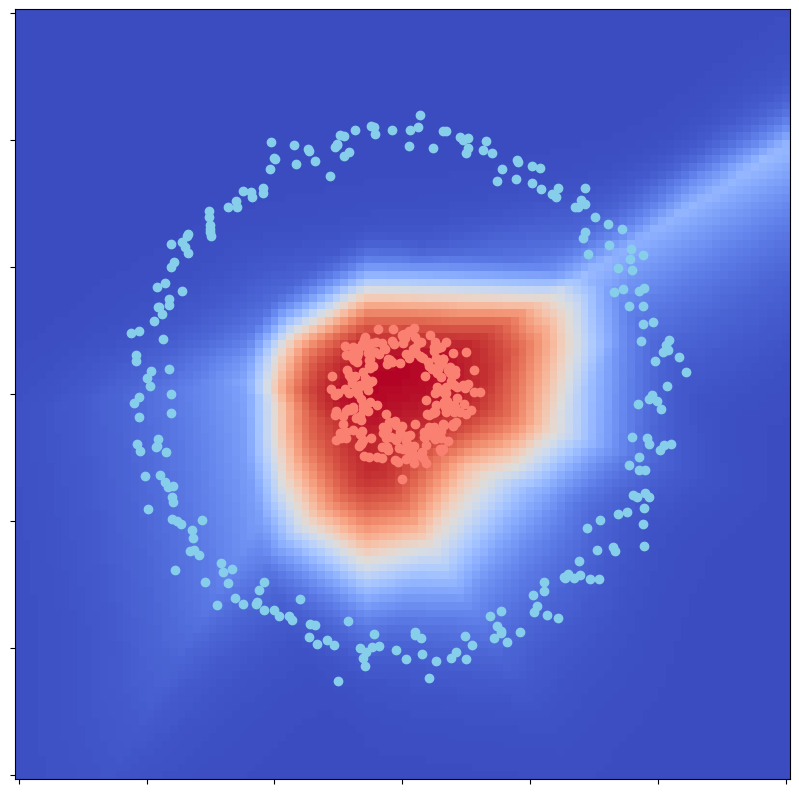

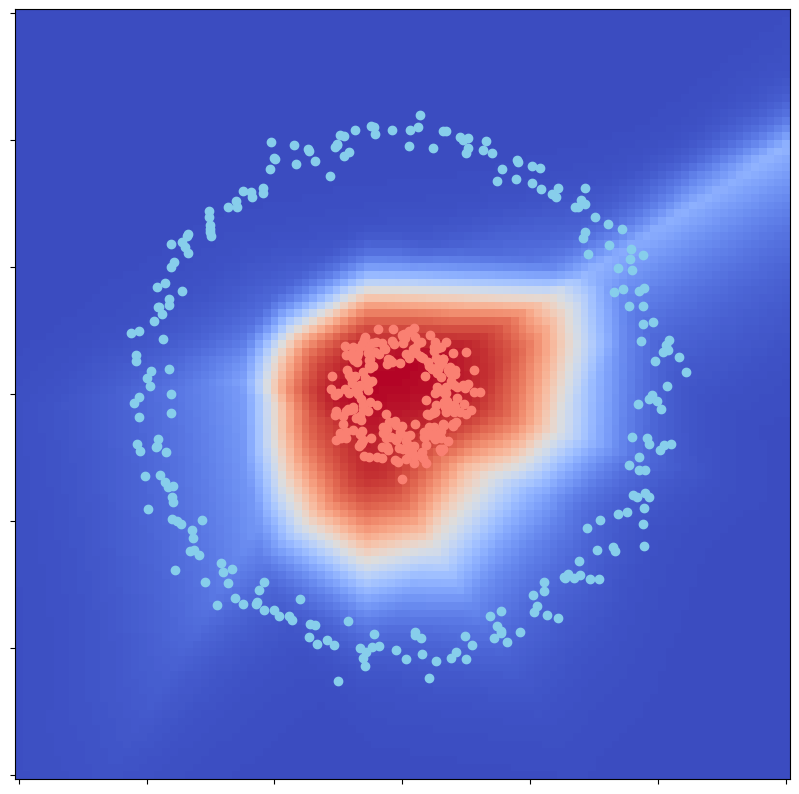

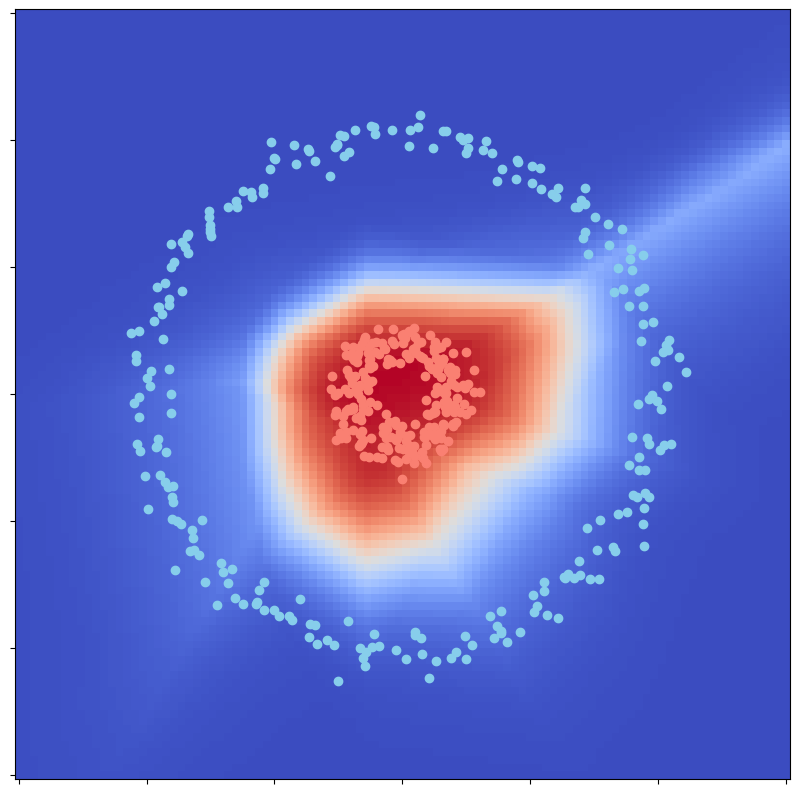

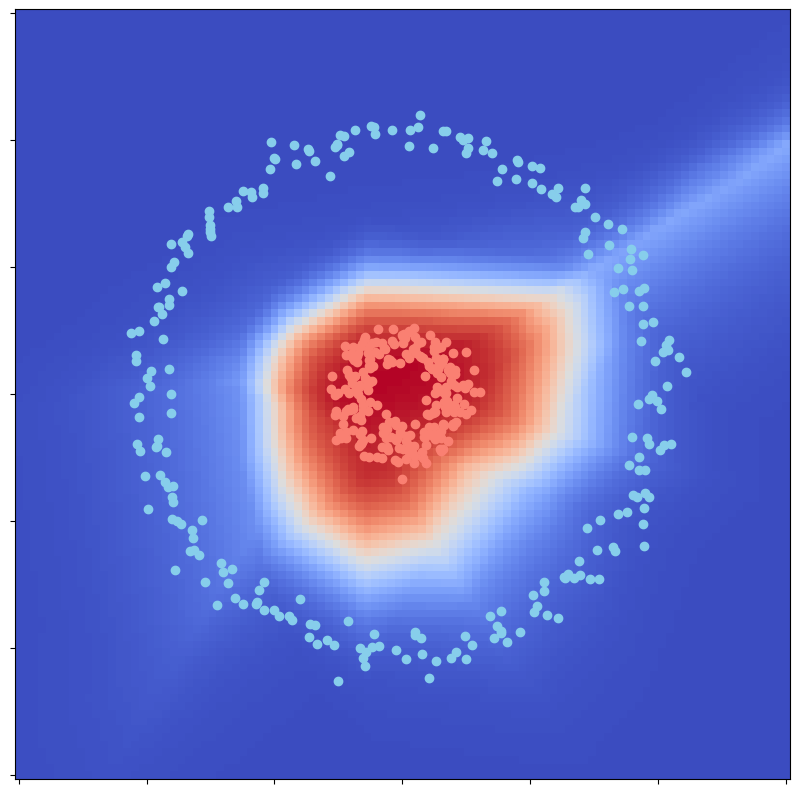

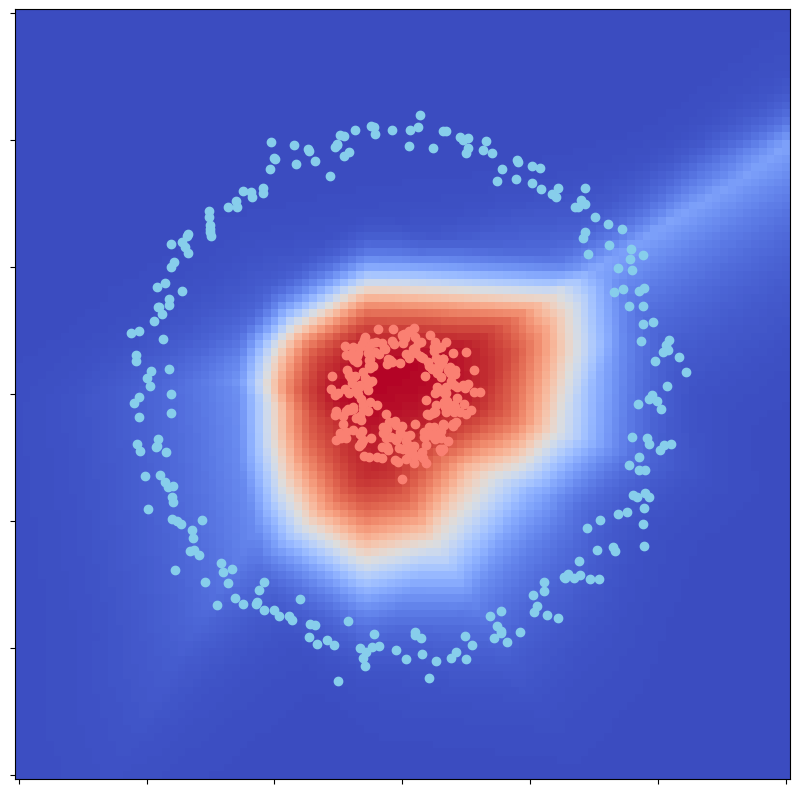

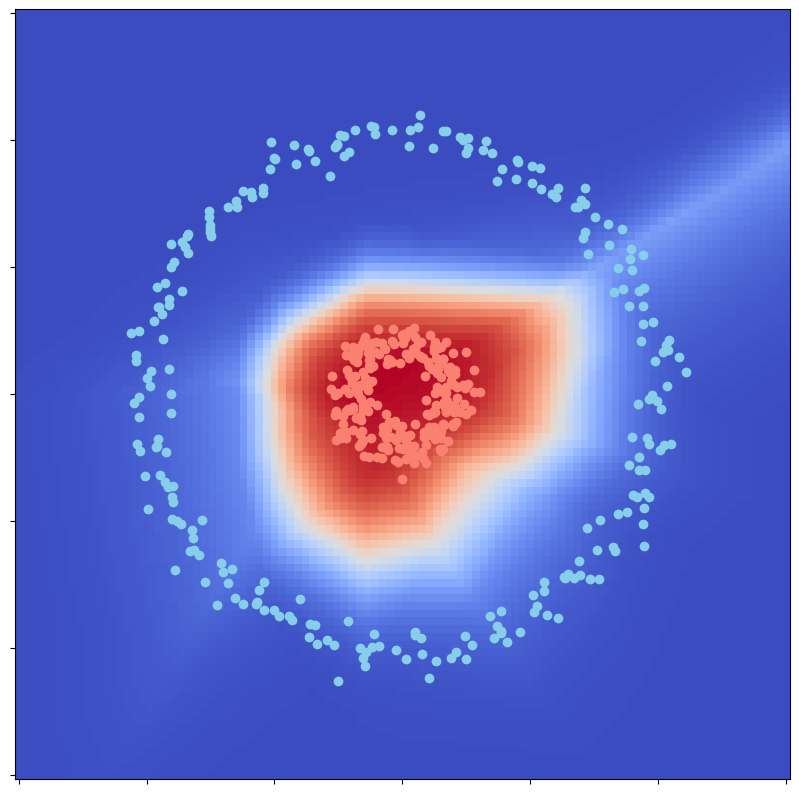

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

#creamos nuestros datos artificiales, donde buscaremos clasificar 2 anillos concentricos de datos
X, y = make_circles(n_samples=500,
                    noise=0.05,
                    factor=0.2)
#resolucion del mapa de prediccion

res= 100

#coordenadas del mapa de prediccion
x0= np.linspace(-1.5, 1.5, res)
x1= np.linspace(-1.5, 1.5, res)

#input con cada combo de coordenadas del mapa de prediccion
px= np.array (np.meshgrid (x0, x1)).T.reshape (-1,2)
#objeto vacio a 0,5 del mapa de prediccion
py= np.zeros ((res, res))+ 0.5

#visualizacion del mapa de prediccion
plt.figure (figsize =(8,8))
plt.pcolormesh (x0, x1, py, cmap= 'coolwarm', vmin= 0, vmax= 1)

#visualizacion de la nube de datos
plt.scatter (X[ y==0,0], X[ y==0,1], c= "skyblue")
plt.scatter (X[ y==1,0], X[ y==1,1], c= "salmon")

plt.tick_params (labelbottom= False, labelleft= False)

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from matplotlib import animation
from IPython.core.display import display, HTML

iX= tf.placeholder ('float', shape= [None, X.shape [1]])
iY= tf.placeholder ('float', shape= [None])

lr=0.01
nn= [2, 16, 8, 1]

W1 = tf.Variable (tf.random_normal ([nn [0], nn [1]]), name = 'weights_1')
b1 = tf.Variable (tf.random_normal ([nn [1]]), name = 'bias_1')
l1 = tf.nn.relu (tf.add (tf.matmul (iX, W1), b1))

W2 = tf.Variable (tf.random_normal ([nn [1], nn [2]]), name = 'weights_2')
b2 = tf.Variable (tf.random_normal ([nn [2]]), name = 'bias_2')
l2 = tf.nn.relu (tf.add (tf.matmul (l1, W2), b2))

W3 = tf.Variable (tf.random_normal ([nn [2], nn [3]]), name = 'weights_3')
b3 = tf.Variable (tf.random_normal ([nn [3]]), name = 'bias_3')

pY = tf.nn.sigmoid (tf.add (tf.matmul (l2, W3), b3))[:,0]

loss = tf.losses.mean_squared_error (pY, iY)

optimizer = tf.train.GradientDescentOptimizer (learning_rate= 0.05).minimize (loss)
n_steps =400
iPY =[]

with tf.Session () as sess:
    sess.run (tf.global_variables_initializer ())
    for step in range (n_steps):
      _, current_loss, current_pY = sess.run ([optimizer, loss, pY ], feed_dict= {iX: X, iY: y})

      if step %25 ==0:
        acc = np.mean (np.round (current_pY) == y)

        print ('step', step, '/', n_steps, 'loss=', current_loss, 'Acc=', acc)
        current_pY_map = sess.run (pY, feed_dict= {iX: px}).reshape (res, res)
        iPY.append (current_pY_map)


        ims = []
        fig = plt.figure (figsize= (10, 10))
        print ('generando animación')

        for fr in range (len (iPY)):
          im = plt.pcolormesh (x0, x1, iPY [fr], cmap= 'coolwarm', animated= True)

          plt.scatter (X[y == 0, 0], X[y == 0, 1], c= "skyblue")
          plt.scatter (X[y == 1, 0], X[y == 1, 1], c= "salmon")

          plt.tick_params (labelbottom= False, labelleft= False)
          ims.append ([im])
          ani = animation.ArtistAnimation(fig, ims, interval= 50, blit= True, repeat_delay= 1000)

          HTML (ani.to_html5_video ())

Iteration 1, loss = 1.64597831
Iteration 2, loss = 0.64313979
Iteration 3, loss = 0.17230607
Iteration 4, loss = 0.13671036
Iteration 5, loss = 0.15287123
Iteration 6, loss = 0.14062492
Iteration 7, loss = 0.12825334
Iteration 8, loss = 0.12537660
Iteration 9, loss = 0.12542298
Iteration 10, loss = 0.12550786
Iteration 11, loss = 0.12520224
Iteration 12, loss = 0.12504901
Iteration 13, loss = 0.12501427
Iteration 14, loss = 0.12503384
Iteration 15, loss = 0.12509005
Iteration 16, loss = 0.12509701
Iteration 17, loss = 0.12506466
Iteration 18, loss = 0.12503660
Iteration 19, loss = 0.12513770
Iteration 20, loss = 0.12506395
Iteration 21, loss = 0.12504957
Iteration 22, loss = 0.12503278
Iteration 23, loss = 0.12506339
Iteration 24, loss = 0.12503557
Iteration 25, loss = 0.12506198
Iteration 26, loss = 0.12506341
Iteration 27, loss = 0.12508791
Iteration 28, loss = 0.12514555
Iteration 29, loss = 0.12510327
Iteration 30, loss = 0.12509273
Iteration 31, loss = 0.12511184
Iteration 32, los

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


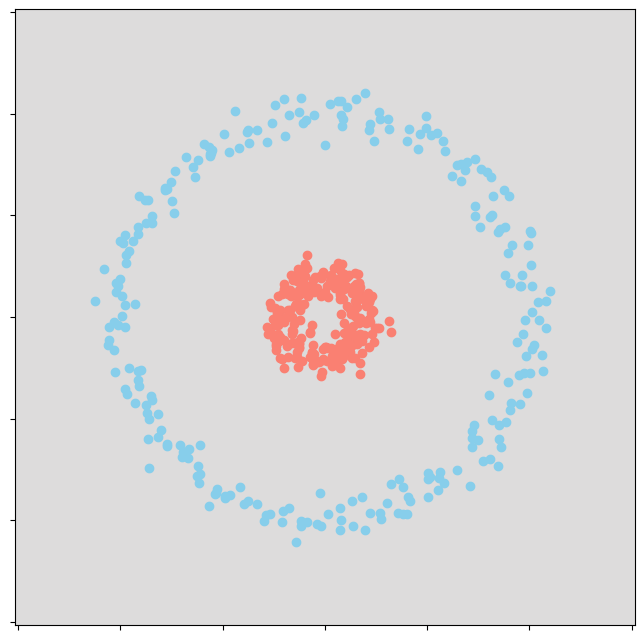

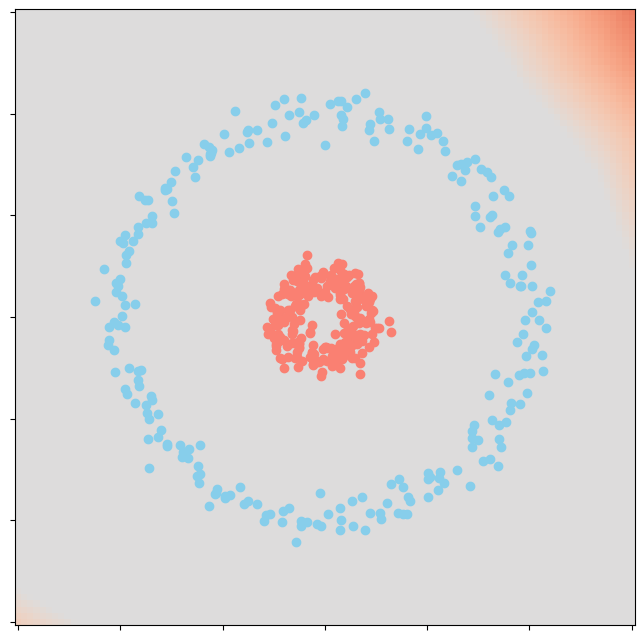

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

#creamos nuestros datos artificiales, donde buscaremos clasificar 2 anillos concentricos de datos
X, y = make_circles(n_samples=500,
                    noise=0.05,
                    factor=0.2)
#resolucion del mapa de prediccion

res= 100

#coordenadas del mapa de prediccion
x0= np.linspace(-1.5, 1.5, res)
x1= np.linspace(-1.5, 1.5, res)

#input con cada combo de coordenadas del mapa de prediccion
px= np.array (np.meshgrid (x0, x1)).T.reshape (-1,2)
#objeto vacio a 0,5 del mapa de prediccion
py= np.zeros ((res, res))+ 0.5

#visualizacion del mapa de prediccion
plt.figure (figsize =(8,8))
plt.pcolormesh (x0, x1, py, cmap= 'coolwarm', vmin= 0, vmax= 1)

#visualizacion de la nube de datos
plt.scatter (X[ y==0,0], X[ y==0,1], c= "skyblue")
plt.scatter (X[ y==1,0], X[ y==1,1], c= "salmon")

plt.tick_params (labelbottom= False, labelleft= False)

import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML


lr= 0.01   #learning rate
nn= [2, 16, 8, 1]  #numero de neuronas por capa

# creamos el objeto del modelo de red neuronal multicapa.

clf = sk.neural_network.MLPRegressor (solver='sgd',
                                     learning_rate_init= lr,
                                     hidden_layer_sizes= tuple (nn[1:]),
                                     verbose= True,
                                     n_iter_no_change= 1000,
                                     batch_size = 64,
                                     max_iter = 500) # Increased max_iter


# y lo entrenamos con nuestros datos
clf.fit (X, y)

# Predict on the prediction map
py = clf.predict(px).reshape(res, res)

# Plot the prediction map
plt.figure(figsize=(8, 8))
plt.pcolormesh(x0, x1, py, cmap='coolwarm', vmin=0, vmax=1)

# Plot the original data points
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="skyblue")
plt.scatter(X[y == 1, 0], X[y == 1, 1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5233 - loss: 0.2177  
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6313 - loss: 0.2174 
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7311 - loss: 0.2078 
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8937 - loss: 0.2088 
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9176 - loss: 0.2035 
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9532 - loss: 0.1998 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9861 - loss: 0.1939 
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9965 - loss: 0.1876 
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9979 - loss: 0.1811 
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 0.1789 
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 0.1741 
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 1.0000 - loss: 0.1650 
Epoch 13/100
16/16 ━━━━━

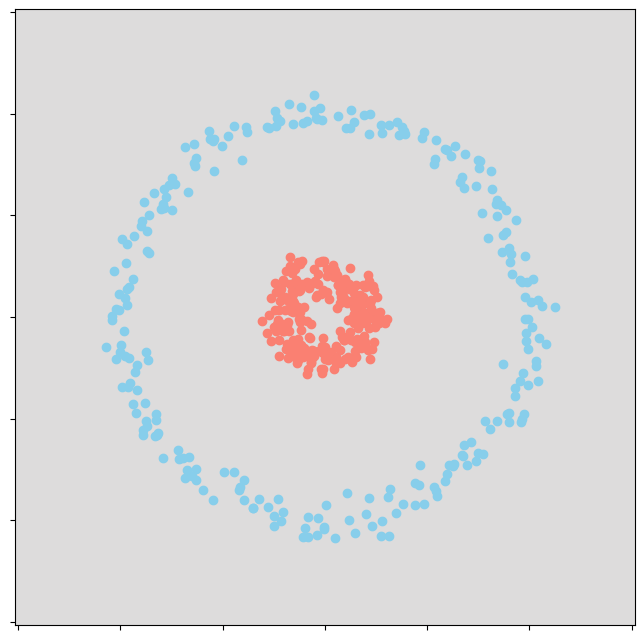

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

#creamos nuestros datos artificiales, donde buscaremos clasificar 2 anillos concentricos de datos
X, y = make_circles(n_samples=500,
                    noise=0.05,
                    factor=0.2)
#resolucion del mapa de prediccion

res= 100

#coordenadas del mapa de prediccion
x0= np.linspace(-1.5, 1.5, res)
x1= np.linspace(-1.5, 1.5, res)

#input con cada combo de coordenadas del mapa de prediccion
px= np.array (np.meshgrid (x0, x1)).T.reshape (-1,2)
#objeto vacio a 0,5 del mapa de prediccion
py= np.zeros ((res, res))+ 0.5

#visualizacion del mapa de prediccion
plt.figure (figsize =(8,8))
plt.pcolormesh (x0, x1, py, cmap= 'coolwarm', vmin= 0, vmax= 1)

#visualizacion de la nube de datos
plt.scatter (X[ y==0,0], X[ y==0,1], c= "skyblue")
plt.scatter (X[ y==1,0], X[ y==1,1], c= "salmon")

plt.tick_params (labelbottom= False, labelleft= False)

import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML

lr= 0.01   #learning rate
nn= [2, 16, 8, 1]  #numero de neuronas por capa

model =kr.Sequential()

l1 = model.add(kr.layers.Dense (nn [1], activation= 'relu' ))
l2 = model.add(kr.layers.Dense (nn [2], activation= 'relu' ))
l3 = model.add(kr.layers.Dense (nn [3], activation= 'sigmoid' ))

model.compile (loss= 'mse', optimizer=kr.optimizers.SGD (learning_rate=0.05), metrics =['acc'] )

model.fit (X, y, epochs=100)